

# NextGenerationEU

&nbsp;&nbsp;<img src='images/next_gen_eu_logo.jpg' width="300" height="200" align="right" style="padding: 20px">

NextGenerationEU is a more than €800 billion temporary recovery instrument to help repair the immediate economic and social damage brought about by the coronavirus pandemic. Post-COVID-19 Europe will be greener, more digital, more resilient and better fit for the current and forthcoming challenges.

The Recovery and Resilience Facility: the centrepiece of NextGenerationEU with €723.8 billion in loans and grants available to support reforms and investments undertaken by EU countries. The aim is to mitigate the economic and social impact of the coronavirus pandemic and make European economies and societies more sustainable, resilient and better prepared for the challenges and opportunities of the green and digital transitions. Member States are working on their recovery and resilience plans to access the funds under the Recovery and Resilience Facility.

Source: https://ec.europa.eu/info/strategy/recovery-plan-europe_en



This repository contains the analysis of The Recovery and Resilience Facility. It explains the way how are the founds divided between Member States.
<table>
    <tr>
        <td><img src='images/total_per_member.png' width=400 height=300> </td>
        <td><img src='images/total_per_member.png' width=400 height=300> </td>
    </tr>
    <tr>
        <td><img src='images/covid_scatter.png' width=400 height=300> </td>
        <td><img src='images/covid_reg.png' width=400 height=300></td>
    </tr>
</table>
    

In [1]:
# We need to install tabula module: pip install tabula-py
# and install java (https://www.oracle.com/java/technologies/downloads/#java8)
# and add a java installation folder to the PATH variable.
# This is done.

# Import Module 

import tabula
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Import and clean data

In [2]:
# We will use data from European Commission page

# Link to a data
link = 'https://ec.europa.eu/info/sites/default/files/about_the_european_commission/eu_budget/recovery_and_resilience_facility_.pdf'

In [3]:
# Read PDF File with tabula module
# this contain a list, get first element
df = tabula.read_pdf(link, pages = 1)[0]
# Convert into csv file, if we need it
#df.to_csv('ReactEU.csv')

# Let's look into the data
df

,Unnamed: 0,For 70% of For 30% of,Unnamed: 1
0,NaN,Totalthe amount available the amount available,NaN
1,Belgium,3.6 2.3,5.9
2,Bulgaria,4.6 1.6,6.3
3,Czechia,3.5 3.5,7.1
4,Denmark,1.3 0.2,1.6
5,Germany,16.3 9.3,25.6
6,Estonia,0.8 0.2,1.0
7,Ireland,0.9 0.1,1.0
8,Greece,13.5 4.3,17.8
9,Spain,46.6 22.9,69.5


In [4]:
# Rename columns
df.columns = ['Country', '70% 30%', 'Total']

# drop first and last record
df.drop([0, 28], inplace = True)

# split '70% 30%' column by space
df['70%'] =df['70% 30%'].str.split(' ').str.get(0)
df['30%']=df['70% 30%'].str.split(' ').str.get(1)

# Dataset after cleaning
df

,Country,70% 30%,Total,70%,30%
1,Belgium,3.6 2.3,5.9,3.6,2.3
2,Bulgaria,4.6 1.6,6.3,4.6,1.6
3,Czechia,3.5 3.5,7.1,3.5,3.5
4,Denmark,1.3 0.2,1.6,1.3,0.2
5,Germany,16.3 9.3,25.6,16.3,9.3
6,Estonia,0.8 0.2,1.0,0.8,0.2
7,Ireland,0.9 0.1,1.0,0.9,0.1
8,Greece,13.5 4.3,17.8,13.5,4.3
9,Spain,46.6 22.9,69.5,46.6,22.9
10,France,24.3 15.0,39.4,24.3,15.0


# Grants allocation per Member State

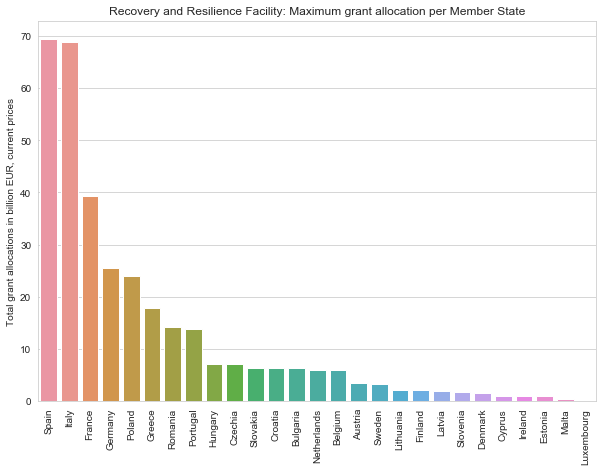

In [5]:
# Let's make a barplot

sns.set_style("whitegrid")

plt.figure(figsize=(10, 7))
sns.barplot(x="Country", y="Total", data=df.sort_values(by='Total', ascending = False))

plt.xticks(rotation=90)
plt.title('Recovery and Resilience Facility: Maximum grant allocation per Member State')
plt.xlabel('')

plt.ylabel('Total grant allocations in billion EUR, current prices')

# Save plot in png file
plt.savefig('total_per_member.png')

#show the plot
plt.show()

# Population EU Member States

Data come from Eurostat News relase: EU population in 2020: almost 448 million
https://ec.europa.eu/eurostat/documents/2995521/11081093/3-10072020-AP-EN.pdf/d2f799bf-4412-05cc-a357-7b49b93615f1
10 July 2020


In [6]:
# reading population data from pdf file

link_pop = 'https://ec.europa.eu/eurostat/documents/2995521/11081093/3-10072020-AP-EN.pdf/d2f799bf-4412-05cc-a357-7b49b93615f1'
pop = tabula.read_pdf(link_pop, pages = 5)[0]
pop

,Unnamed: 0,Population 1.1.2019\r(in thousand),Population 1.1.2020\r(in thousand),Change 2020/2019\r(per thousand)*,Share in EU population\r2020 (%)
0,EU**,446 824.6,44 7706.2,2.0,100
1,Belgium,11 455.5,11 549.9,8.2,2.6
2,Bulgaria,7 000.0,6 951.5,-7.0,1.6
3,Czechia,10 649.8,10 693.9,4.1,2.4
4,Denmark,5 806.1,5 822.8,2.9,1.3
5,Germany,83 019.2,83 166.7,1.8,18.6
6,Estonia,1 324.8,1 329.0,3.1,0.3
7,Ireland,4 904.2,4 963.8,12.1,1.1
8,Greece,10 724.6,10 709.7,-1.4,2.4
9,Spain,46 937.1,47 330.0,8.3,10.6


In [7]:
# rename columns
pop.columns = ['Country', 'Population 2019', 'Population 2020', 'Change 2020/2019', 'Share in EU population']

# Choosing columns to analysis

pop1 = pop[['Country', 'Population 2020']]
# Population 2020 contains data per thousand


In [8]:
# Joining the population column with grants allocations table.
grants_pop = df.merge(pop1, on='Country', how='left')
grants_pop

,Country,70% 30%,Total,70%,30%,Population 2020
0,Belgium,3.6 2.3,5.9,3.6,2.3,11 549.9
1,Bulgaria,4.6 1.6,6.3,4.6,1.6,6 951.5
2,Czechia,3.5 3.5,7.1,3.5,3.5,10 693.9
3,Denmark,1.3 0.2,1.6,1.3,0.2,5 822.8
4,Germany,16.3 9.3,25.6,16.3,9.3,83 166.7
5,Estonia,0.8 0.2,1.0,0.8,0.2,1 329.0
6,Ireland,0.9 0.1,1.0,0.9,0.1,4 963.8
7,Greece,13.5 4.3,17.8,13.5,4.3,10 709.7
8,Spain,46.6 22.9,69.5,46.6,22.9,47 330.0
9,France,24.3 15.0,39.4,24.3,15.0,67 098.8


# Total allocation per capita of Member State

Total column has data in billion EUR. Population 2020 contains data per thousand. We need to calculate total allocation per capita with convert according to units.

In [9]:
# Checking data types

grants_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          27 non-null     object 
 1   70% 30%          27 non-null     object 
 2   Total            27 non-null     float64
 3   70%              27 non-null     object 
 4   30%              27 non-null     object 
 5   Population 2020  27 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.5+ KB


In [10]:
# We need to convert Population 2020 to float
# Removing white spaces first
grants_pop['Population 2020'] = grants_pop['Population 2020'].str.replace(' ', '')

# applying float function
grants_pop['Population 2020'] = grants_pop['Population 2020'].apply(float)
grants_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          27 non-null     object 
 1   70% 30%          27 non-null     object 
 2   Total            27 non-null     float64
 3   70%              27 non-null     object 
 4   30%              27 non-null     object 
 5   Population 2020  27 non-null     float64
dtypes: float64(2), object(4)
memory usage: 1.5+ KB


In [11]:
# Now we add new column with calculation of amounts allocation per capita
grants_pop['per capita'] = (grants_pop['Total']*1000000000)/(grants_pop['Population 2020']*1000)
grants_pop

,Country,70% 30%,Total,70%,30%,Population 2020,per capita
0,Belgium,3.6 2.3,5.9,3.6,2.3,11549.9,510.826934
1,Bulgaria,4.6 1.6,6.3,4.6,1.6,6951.5,906.279220
2,Czechia,3.5 3.5,7.1,3.5,3.5,10693.9,663.929904
3,Denmark,1.3 0.2,1.6,1.3,0.2,5822.8,274.781892
4,Germany,16.3 9.3,25.6,16.3,9.3,83166.7,307.815508
5,Estonia,0.8 0.2,1.0,0.8,0.2,1329.0,752.445448
6,Ireland,0.9 0.1,1.0,0.9,0.1,4963.8,201.458560
7,Greece,13.5 4.3,17.8,13.5,4.3,10709.7,1662.044688
8,Spain,46.6 22.9,69.5,46.6,22.9,47330.0,1468.413269
9,France,24.3 15.0,39.4,24.3,15.0,67098.8,587.193810


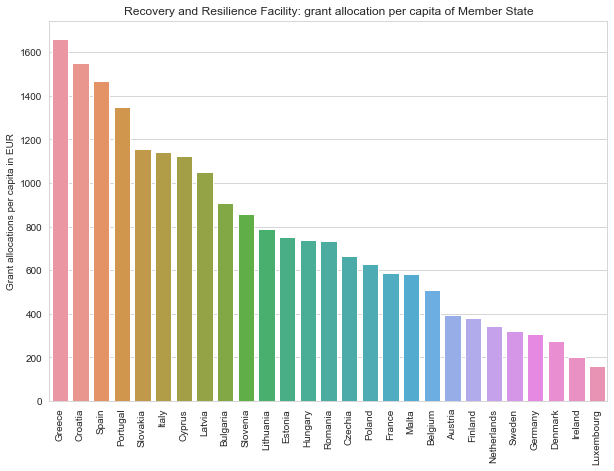

In [12]:
#Lets make a new barplot

plt.figure(figsize=(10, 7))
sns.barplot(x="Country", y="per capita", data=grants_pop.sort_values(by='per capita', ascending = False))

plt.xticks(rotation=90)
plt.title('Recovery and Resilience Facility: grant allocation per capita of Member State')
plt.xlabel('')

plt.ylabel('Grant allocations per capita in EUR')

# Save plot in png file
plt.savefig('per capita.png')

#show the plot
plt.show()

Now it's look quite different. Spain and Italy are countries 

NextGenerationEU is a instrument to help repair the immediate economic and social damage brought about by the coronavirus pandemic. Let's see relation between a number of total cases of covid and the amount of maximum grant allocation.

# Fund distribution algorithm

We can read on European Commission's page:

"Most of the funding will be provided through grants, with possible top-ups via loans. The total amount of grants available will be €310 billion (in constant prices; 335 billion in current prices), while an additional €250 billion in loans (in constant prices; 268 billion in current prices).
Regarding grants, a maximum amount per Member State will be determined based on a pre-defined allocation key, which takes into account population, GDP per capita and unemployment. The key will be particularly beneficial to the countries most affected by the crisis, notably those with low per capita income and high unemployment.
In addition to grants, Member States may request a loan for implementing their reforms and public investments. Loans need to be justified by the higher financial needs linked to the recovery and resilience plans put forward by Member States. The maximum volume of loans for each Member State will not exceed 4.7% of its Gross National Income. However, an increase will be possible in exceptional circumstances subject to available resources."

https://ec.europa.eu/commission/presscorner/detail/en/qanda_20_949

Let's check how does it look with real data.



# Covid cases

In [13]:
# Let's see the data of covid published on data.europa.eu

# download data from 
link_covid = 'https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/csv'

covid_df = pd.read_csv(link_covid)
covid_df.sample(10)

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
15769,Guinea,GIN,Africa,13132792,cases,27,2021-42,1.119335,30626,Epidemic intelligence national data
2071,Aruba,ABW,America,106766,cases,116,2021-43,186.388925,15931,Epidemic intelligence national data
18021,Ireland,IRL,Europe,4964440,deaths,52,2021-11,23.164748,4541,TESSy COVID-19
29085,Puerto Rico,PRI,America,2860840,cases,538,2021-27,32.263251,140944,Epidemic intelligence national data
5665,British Virgin Islands,VGB,America,30237,deaths,0,2020-34,0.000000,1,Epidemic intelligence national data
1848,Armenia,ARM,Europe,2963234,cases,2272,2020-53,207.712250,160220,Epidemic intelligence national data
16817,Hungary,HUN,Europe,9769526,deaths,6,2020-12,0.716514,7,TESSy COVID-19
17541,Iran,IRN,Asia,83992953,cases,54112,2021-11,142.134543,1801065,Epidemic intelligence national data
20175,Kyrgyzstan,KGZ,Asia,6524191,deaths,67,2021-27,20.079118,2113,Epidemic intelligence national data
26997,Oceania (total),NaN,Oceania,40958320,cases,2090,2020-14,12.163585,6847,Epidemic intelligence national data


In [14]:
# We took number of deaths at the end of 2020 year and from Europe 

covid = covid_df[(covid_df['continent'] == 'Europe') & (covid_df['year_week'] == '2020-53') & (covid_df['indicator'] == 'deaths')]
covid

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
514,Albania,ALB,Europe,2845955,deaths,29,2020-53,36.894470,1193,Epidemic intelligence national data
1070,Andorra,AND,Europe,76177,deaths,2,2020-53,39.381966,84,Epidemic intelligence national data
1944,Armenia,ARM,Europe,2963234,deaths,89,2020-53,70.193579,2864,Epidemic intelligence national data
2688,Austria,AUT,Europe,8901064,deaths,397,2020-53,96.280624,6519,TESSy COVID-19
2880,Azerbaijan,AZE,Europe,10139175,deaths,195,2020-53,51.582106,2733,Epidemic intelligence national data
3780,Belarus,BLR,Europe,9449321,deaths,57,2020-53,13.440119,1451,Epidemic intelligence national data
3972,Belgium,BEL,Europe,11522440,deaths,454,2020-53,85.919302,19748,TESSy COVID-19
5158,Bosnia And Herzegovina,BIH,Europe,3280815,deaths,178,2020-53,145.695506,4131,Epidemic intelligence national data
6048,Bulgaria,BGR,Europe,6951482,deaths,521,2020-53,157.232659,7644,TESSy COVID-19
9032,Croatia,HRV,Europe,4058165,deaths,333,2020-53,200.829685,4072,Epidemic intelligence national data


In [15]:
# To next analisys we need kolumns: country, cumulative_count

cov = covid[['country', 'cumulative_count']]
cov

,country,cumulative_count
514,Albania,1193
1070,Andorra,84
1944,Armenia,2864
2688,Austria,6519
2880,Azerbaijan,2733
3780,Belarus,1451
3972,Belgium,19748
5158,Bosnia And Herzegovina,4131
6048,Bulgaria,7644
9032,Croatia,4072


In [16]:
# let's join this data with our result

grants_pop_cov = grants_pop.merge(cov, left_on='Country', right_on = 'country', how='left')
grants_pop_cov

,Country,70% 30%,Total,70%,30%,Population 2020,per capita,country,cumulative_count
0,Belgium,3.6 2.3,5.9,3.6,2.3,11549.9,510.826934,Belgium,19748
1,Bulgaria,4.6 1.6,6.3,4.6,1.6,6951.5,906.279220,Bulgaria,7644
2,Czechia,3.5 3.5,7.1,3.5,3.5,10693.9,663.929904,Czechia,12383
3,Denmark,1.3 0.2,1.6,1.3,0.2,5822.8,274.781892,Denmark,1374
4,Germany,16.3 9.3,25.6,16.3,9.3,83166.7,307.815508,Germany,43847
5,Estonia,0.8 0.2,1.0,0.8,0.2,1329.0,752.445448,Estonia,309
6,Ireland,0.9 0.1,1.0,0.9,0.1,4963.8,201.458560,Ireland,2092
7,Greece,13.5 4.3,17.8,13.5,4.3,10709.7,1662.044688,Greece,5002
8,Spain,46.6 22.9,69.5,46.6,22.9,47330.0,1468.413269,Spain,51078
9,France,24.3 15.0,39.4,24.3,15.0,67098.8,587.193810,France,66832


In [18]:
# We'll need country names to label the points
countries= grants_pop_cov['Country']
list(enumerate (countries))


[(0, 'Belgium'),
 (1, 'Bulgaria'),
 (2, 'Czechia'),
 (3, 'Denmark'),
 (4, 'Germany'),
 (5, 'Estonia'),
 (6, 'Ireland'),
 (7, 'Greece'),
 (8, 'Spain'),
 (9, 'France'),
 (10, 'Croatia'),
 (11, 'Italy'),
 (12, 'Cyprus'),
 (13, 'Latvia'),
 (14, 'Lithuania'),
 (15, 'Luxembourg'),
 (16, 'Hungary'),
 (17, 'Malta'),
 (18, 'Netherlands'),
 (19, 'Austria'),
 (20, 'Poland'),
 (21, 'Portugal'),
 (22, 'Romania'),
 (23, 'Slovenia'),
 (24, 'Slovakia'),
 (25, 'Finland'),
 (26, 'Sweden')]

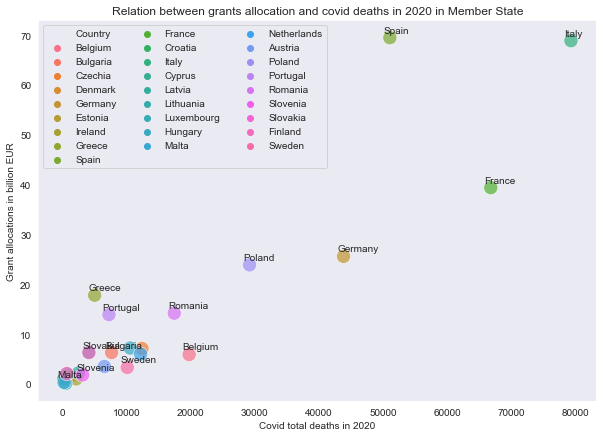

In [50]:
# Generate scatterplot to see relation between maximum grant allocation and covid cases in 2020.

sns.set_style('dark')
plt.figure(figsize=(10, 7))
ax = sns.scatterplot(x='cumulative_count', y= 'Total', data = grants_pop_cov,
              s = 200, hue = 'Country', alpha = 0.7)
plt.title('Relation between grants allocation and covid deaths in 2020 in Member State')
plt.xlabel('Covid total deaths in 2020')
plt.ylabel('Grant allocations in billion EUR')

plt.legend(loc="upper left", ncol=3, handlelength=2)


# Annotate label points 

y = grants_pop_cov['Total']
x = grants_pop_cov['cumulative_count']
for i, country in enumerate (countries):
    if i in [0,1,4,7,8,9,11, 17,20,21,22,23,24,26]:
        plt.annotate(country, (x[i]-1000, y[i]+1) )

# Save plot in png file
plt.savefig('images/covid_scatter.png')

#show the plot
plt.show()


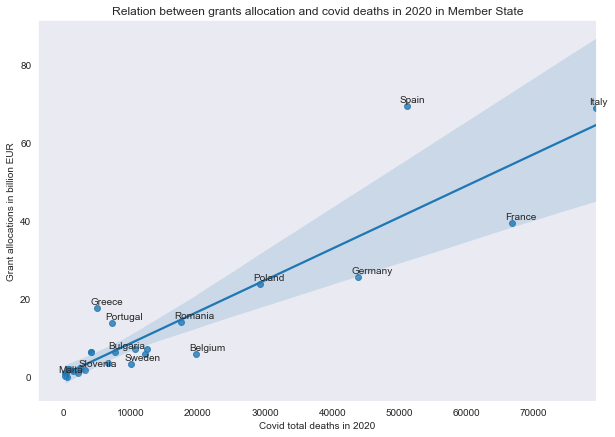

In [51]:
# Let's see, how does it look regression line

sns.set_style('dark')
plt.figure(figsize=(10, 7))
ax = sns.regplot(x='cumulative_count', y= 'Total', data = grants_pop_cov)
plt.title('Relation between grants allocation and covid deaths in 2020 in Member State')
plt.xlabel('Covid total deaths in 2020')
plt.ylabel('Grant allocations in billion EUR')

# Annotate some label points 
countries= grants_pop_cov['Country']
y = grants_pop_cov['Total']
x = grants_pop_cov['cumulative_count']
for i, country in enumerate (countries):
    if i in [0,1,4,7,8,9,11, 17,20,21,22,23,26]:
        plt.annotate(country, (x[i]-1000, y[i]+1) )

# Save plot in png file
plt.savefig('images/covid_reg.png')

#show the plot
plt.show()